# BREAST CANCER RISK PREDICTION

## DATASET :

Breast Cancer Risk Prediction - 

- Description :- It provides a comprehensive view of factors associated with breast cancer diagnosis, treatment, and prognosis.

- Columns :- breast cancer patients, including demographic information, clinical details, tumor characteristics, treatment information, and outcomes.

- Purpose :- The models will help identify factors influencing breast cancer survival, allowing for more targeted and personalized treatment approaches

- Application :- Risk Prediction , Survival Analysis , Treatment Optimization

- Relevance :- Breast cancer is a leading cause of cancer-related deaths among women, and this dataset plays a crucial role in advancing research, improving personalized treatments, and enhancing early diagnosis strategies.

## IMPORTING LIBRARIES

In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Import mtick for PercentFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## LOADING THE DATASET

In [91]:
df = pd.read_csv(r"C:\Users\rniti\OneDrive\Desktop\New folder\Breast Cancer Risk Prediction - R NITIN\Breast Cancer METABRIC.csv")

## DATA PREPROCESSING 

In [92]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [93]:
columns = df.columns

columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [94]:
# Checking shape of dataset

df.shape

(2509, 34)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [96]:
df.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [98]:
# Checking the unique values of Target variables

df["Patient's Vital Status"].value_counts()

Patient's Vital Status
Living                  837
Died of Disease         646
Died of Other Causes    497
Name: count, dtype: int64

In [99]:
# Checking for null values

df.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [100]:
# Checking Total Null values in dataset

df.isnull().sum().sum()

10929

In [101]:
# Checking Null values percentage of each columns

(df.isnull().sum()/df.shape[0]) * 100

Patient ID                         0.000000
Age at Diagnosis                   0.438422
Type of Breast Surgery            22.080510
Cancer Type                        0.000000
Cancer Type Detailed               0.000000
Cellularity                       23.595058
Chemotherapy                      21.084097
Pam50 + Claudin-low subtype       21.084097
Cohort                             0.438422
ER status measured by IHC          3.308091
ER Status                          1.594261
Neoplasm Histologic Grade          4.822639
HER2 status measured by SNP6      21.084097
HER2 Status                       21.084097
Tumor Other Histologic Subtype     5.380630
Hormone Therapy                   21.084097
Inferred Menopausal State         21.084097
Integrative Cluster               21.084097
Primary Tumor Laterality          25.468314
Lymph nodes examined positive     10.601833
Mutation Count                     6.058191
Nottingham prognostic index        8.848147
Oncotree Code                   

In [102]:
# Checking Total Null values percentage of dataset

(df.isnull().sum().sum() / ( df.shape[0] * df.shape[1])) * 100

12.81152556678311

In [103]:
# Drop the Null values of Target variables i.e " Patient's Vital Status "

df.dropna(subset=["Patient's Vital Status"],inplace=True)

In [104]:
df.shape

(1980, 34)

In [105]:
# Again checking the Null values of dataset

df.isnull().sum()

Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery             26
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                        64
Chemotherapy                        1
Pam50 + Claudin-low subtype         1
Cohort                              0
ER status measured by IHC          43
ER Status                           0
Neoplasm Histologic Grade          88
HER2 status measured by SNP6        1
HER2 Status                         1
Tumor Other Histologic Subtype     44
Hormone Therapy                     1
Inferred Menopausal State           1
Integrative Cluster                 1
Primary Tumor Laterality          111
Lymph nodes examined positive      76
Mutation Count                    121
Nottingham prognostic index         1
Oncotree Code                       0
Overall Survival (Months)           0
Overall Survival Status             0
PR Status                           1
Radio Therap

### Intepretation

The "Patient ID" column is not useful for this model and can be removed as it does not contribute to the analysis. Additionally, the "Sex" column is irrelevant because the model is specifically designed for female patients. Columns like "Tumor Size" and "3-Gene Classifier Subtype" have a significant number of missing values, so removing these columns is the most effective option to ensure data quality and improve model performance.

In [106]:
# Drop the columns from dataset

df.drop(columns=['Tumor Stage','3-Gene classifier subtype' , 'Sex','Patient ID'] , inplace= True)

In [107]:
df.shape

(1980, 30)

In [108]:
df.isnull().sum() # checking null values

Age at Diagnosis                    0
Type of Breast Surgery             26
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                        64
Chemotherapy                        1
Pam50 + Claudin-low subtype         1
Cohort                              0
ER status measured by IHC          43
ER Status                           0
Neoplasm Histologic Grade          88
HER2 status measured by SNP6        1
HER2 Status                         1
Tumor Other Histologic Subtype     44
Hormone Therapy                     1
Inferred Menopausal State           1
Integrative Cluster                 1
Primary Tumor Laterality          111
Lymph nodes examined positive      76
Mutation Count                    121
Nottingham prognostic index         1
Oncotree Code                       0
Overall Survival (Months)           0
Overall Survival Status             0
PR Status                           1
Radio Therapy                       1
Relapse Free

In [109]:
df.dropna(subset='PR Status', inplace=True) # drop null values of " PR Status "

In [110]:
df.isnull().sum()

Age at Diagnosis                    0
Type of Breast Surgery             25
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                        63
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                              0
ER status measured by IHC          43
ER Status                           0
Neoplasm Histologic Grade          88
HER2 status measured by SNP6        0
HER2 Status                         0
Tumor Other Histologic Subtype     44
Hormone Therapy                     0
Inferred Menopausal State           0
Integrative Cluster                 0
Primary Tumor Laterality          110
Lymph nodes examined positive      76
Mutation Count                    121
Nottingham prognostic index         0
Oncotree Code                       0
Overall Survival (Months)           0
Overall Survival Status             0
PR Status                           0
Radio Therapy                       0
Relapse Free

In [111]:
df.isna().sum().sum()  # Total Null values of dataset left

596

In [112]:
(df.isna().sum() / df.shape[0]) * 100  # Percentage of Null values in each columns

Age at Diagnosis                  0.000000
Type of Breast Surgery            1.263264
Cancer Type                       0.000000
Cancer Type Detailed              0.000000
Cellularity                       3.183426
Chemotherapy                      0.000000
Pam50 + Claudin-low subtype       0.000000
Cohort                            0.000000
ER status measured by IHC         2.172815
ER Status                         0.000000
Neoplasm Histologic Grade         4.446690
HER2 status measured by SNP6      0.000000
HER2 Status                       0.000000
Tumor Other Histologic Subtype    2.223345
Hormone Therapy                   0.000000
Inferred Menopausal State         0.000000
Integrative Cluster               0.000000
Primary Tumor Laterality          5.558363
Lymph nodes examined positive     3.840323
Mutation Count                    6.114199
Nottingham prognostic index       0.000000
Oncotree Code                     0.000000
Overall Survival (Months)         0.000000
Overall Sur

In [113]:
# Total Percentage of Null values in the dataset left

df.isnull().sum().sum() / ( df.shape[0] * df.shape[1]) * 100 

1.0038740104429849

In [114]:
df['Integrative Cluster'].value_counts()  # Checking the unique values in " Integrative Cluster "

Integrative Cluster
8       299
3       290
4ER+    260
10      226
5       190
7       189
9       146
1       139
6        85
4ER-     83
2        72
Name: count, dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 1984
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                1979 non-null   float64
 1   Type of Breast Surgery          1954 non-null   object 
 2   Cancer Type                     1979 non-null   object 
 3   Cancer Type Detailed            1979 non-null   object 
 4   Cellularity                     1916 non-null   object 
 5   Chemotherapy                    1979 non-null   object 
 6   Pam50 + Claudin-low subtype     1979 non-null   object 
 7   Cohort                          1979 non-null   float64
 8   ER status measured by IHC       1936 non-null   object 
 9   ER Status                       1979 non-null   object 
 10  Neoplasm Histologic Grade       1891 non-null   float64
 11  HER2 status measured by SNP6    1979 non-null   object 
 12  HER2 Status                     1979 no

In [116]:
df.describe(include='O').T

,count,unique,top,freq
Type of Breast Surgery,1954,2,Mastectomy,1170
Cancer Type,1979,2,Breast Cancer,1976
Cancer Type Detailed,1979,8,Breast Invasive Ductal Carcinoma,1536
Cellularity,1916,3,High,965
Chemotherapy,1979,2,No,1567
Pam50 + Claudin-low subtype,1979,7,LumA,699
ER status measured by IHC,1936,2,Positve,1497
ER Status,1979,2,Positive,1505
HER2 status measured by SNP6,1979,4,Neutral,1436
HER2 Status,1979,2,Negative,1732


In [117]:
from sklearn.impute import SimpleImputer # Using for filling the null values

In [118]:
# filling the null values for numerical columns by using simple imputer

si = SimpleImputer(strategy= 'mean')
df[["Lymph nodes examined positive", "Tumor Size", "Neoplasm Histologic Grade","Mutation Count"]] = si.fit_transform(df[["Lymph nodes examined positive", "Tumor Size", "Neoplasm Histologic Grade","Mutation Count"]])


In [119]:
# filling the null values for categorical columns by using simple imputer

si = SimpleImputer(strategy= 'most_frequent')
df[["Type of Breast Surgery","Cellularity","ER status measured by IHC","Tumor Other Histologic Subtype","Primary Tumor Laterality"]] = si.fit_transform(df[["Type of Breast Surgery","Cellularity","ER status measured by IHC","Tumor Other Histologic Subtype","Primary Tumor Laterality"]])

In [120]:
df.shape

(1979, 30)

In [121]:
df.isna().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status         

In [122]:
df['Integrative Cluster'].value_counts()

Integrative Cluster
8       299
3       290
4ER+    260
10      226
5       190
7       189
9       146
1       139
6        85
4ER-     83
2        72
Name: count, dtype: int64

In [123]:

df['Integrative Cluster'] = df['Integrative Cluster'].replace({'4ER+':4 , '4ER-':4})

In [124]:
df['Integrative Cluster'].value_counts()

Integrative Cluster
4     343
8     299
3     290
10    226
5     190
7     189
9     146
1     139
6      85
2      72
Name: count, dtype: int64

In [125]:
df['Integrative Cluster'] = pd.to_numeric(df['Integrative Cluster'] , errors='coerce')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 1984
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                1979 non-null   float64
 1   Type of Breast Surgery          1979 non-null   object 
 2   Cancer Type                     1979 non-null   object 
 3   Cancer Type Detailed            1979 non-null   object 
 4   Cellularity                     1979 non-null   object 
 5   Chemotherapy                    1979 non-null   object 
 6   Pam50 + Claudin-low subtype     1979 non-null   object 
 7   Cohort                          1979 non-null   float64
 8   ER status measured by IHC       1979 non-null   object 
 9   ER Status                       1979 non-null   object 
 10  Neoplasm Histologic Grade       1979 non-null   float64
 11  HER2 status measured by SNP6    1979 non-null   object 
 12  HER2 Status                     1979 no

In [127]:
df['Cancer Type Detailed'].value_counts()

Cancer Type Detailed
Breast Invasive Ductal Carcinoma             1536
Breast Mixed Ductal and Lobular Carcinoma     211
Breast Invasive Lobular Carcinoma             146
Invasive Breast Carcinoma                      42
Breast Invasive Mixed Mucinous Carcinoma       23
Breast                                         17
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: count, dtype: int64

In [128]:
df.isna().sum().sum()

0

In [129]:
columns_obj = df.select_dtypes('object').columns

columns_obj

Index(['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype',
       'ER status measured by IHC', 'ER Status',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Oncotree Code', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status', 'Patient's Vital Status'],
      dtype='object')

In [130]:
df_clean = pd.get_dummies(df, columns = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed','Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype','ER status measured by IHC', 'ER Status','HER2 status measured by SNP6', 'HER2 Status','Tumor Other Histologic Subtype', 'Hormone Therapy','Inferred Menopausal State', 'Oncotree Code', 'Overall Survival Status','PR Status', 'Radio Therapy', 'Relapse Free Status','Primary Tumor Laterality'], drop_first = True, dtype = int)


In [131]:
df_clean.shape

(1979, 56)

In [132]:
df_clean.head()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,...,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MBC,Oncotree Code_MDLC,Oncotree Code_PBS,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred,Primary Tumor Laterality_Right
0,75.65,1.0,3.0,4,10.0,5.693757,6.044,140.500000,138.65,22.0,...,0,0,0,0,0,1,0,1,0,1
1,43.19,1.0,3.0,4,0.0,2.000000,4.020,84.633333,83.52,10.0,...,0,0,0,0,0,1,1,1,0,1
2,48.87,1.0,2.0,3,1.0,2.000000,4.030,163.700000,151.28,15.0,...,0,0,0,0,0,0,1,0,1,1
3,47.68,1.0,2.0,9,3.0,1.000000,4.050,164.933333,162.76,25.0,...,0,0,0,1,0,1,1,1,0,1
4,76.97,1.0,3.0,9,8.0,2.000000,6.080,41.366667,18.55,40.0,...,0,0,0,1,0,0,1,1,1,1


In [133]:
df_clean["Patient's Vital Status"]= df_clean["Patient's Vital Status"].replace({'Living' : 0 , 'Died of Disease' : 1 , 'Died of Other Causes' : 2})

C:\Users\rniti\AppData\Local\Temp\ipykernel_4916\4000680805.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean["Patient's Vital Status"]= df_clean["Patient's Vital Status"].replace({'Living' : 0 , 'Died of Disease' : 1 , 'Died of Other Causes' : 2})


In [134]:
df_clean.head()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,...,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MBC,Oncotree Code_MDLC,Oncotree Code_PBS,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred,Primary Tumor Laterality_Right
0,75.65,1.0,3.0,4,10.0,5.693757,6.044,140.500000,138.65,22.0,...,0,0,0,0,0,1,0,1,0,1
1,43.19,1.0,3.0,4,0.0,2.000000,4.020,84.633333,83.52,10.0,...,0,0,0,0,0,1,1,1,0,1
2,48.87,1.0,2.0,3,1.0,2.000000,4.030,163.700000,151.28,15.0,...,0,0,0,0,0,0,1,0,1,1
3,47.68,1.0,2.0,9,3.0,1.000000,4.050,164.933333,162.76,25.0,...,0,0,0,1,0,1,1,1,0,1
4,76.97,1.0,3.0,9,8.0,2.000000,6.080,41.366667,18.55,40.0,...,0,0,0,1,0,0,1,1,1,1


In [135]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 1984
Data columns (total 56 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age at Diagnosis                                                1979 non-null   float64
 1   Cohort                                                          1979 non-null   float64
 2   Neoplasm Histologic Grade                                       1979 non-null   float64
 3   Integrative Cluster                                             1979 non-null   int64  
 4   Lymph nodes examined positive                                   1979 non-null   float64
 5   Mutation Count                                                  1979 non-null   float64
 6   Nottingham prognostic index                                     1979 non-null   float64
 7   Overall Survival (Months)                               

In [136]:
df['Tumor Size'].value_counts()

Tumor Size
20.0    236
25.0    171
30.0    156
15.0    152
18.0     76
       ... 
12.8      1
18.5      1
16.9      1
24.4      1
20.5      1
Name: count, Length: 113, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [137]:
df_clean.corr()["Patient's Vital Status"]

Age at Diagnosis                                                  0.392702
Cohort                                                            0.182168
Neoplasm Histologic Grade                                         0.005285
Integrative Cluster                                              -0.007195
Lymph nodes examined positive                                     0.059344
Mutation Count                                                    0.086870
Nottingham prognostic index                                       0.013820
Overall Survival (Months)                                        -0.216659
Relapse Free Status (Months)                                     -0.209273
Tumor Size                                                        0.095884
Patient's Vital Status                                            1.000000
Type of Breast Surgery_Mastectomy                                 0.155674
Cancer Type_Breast Sarcoma                                       -0.040191
Cancer Type Detailed_Brea

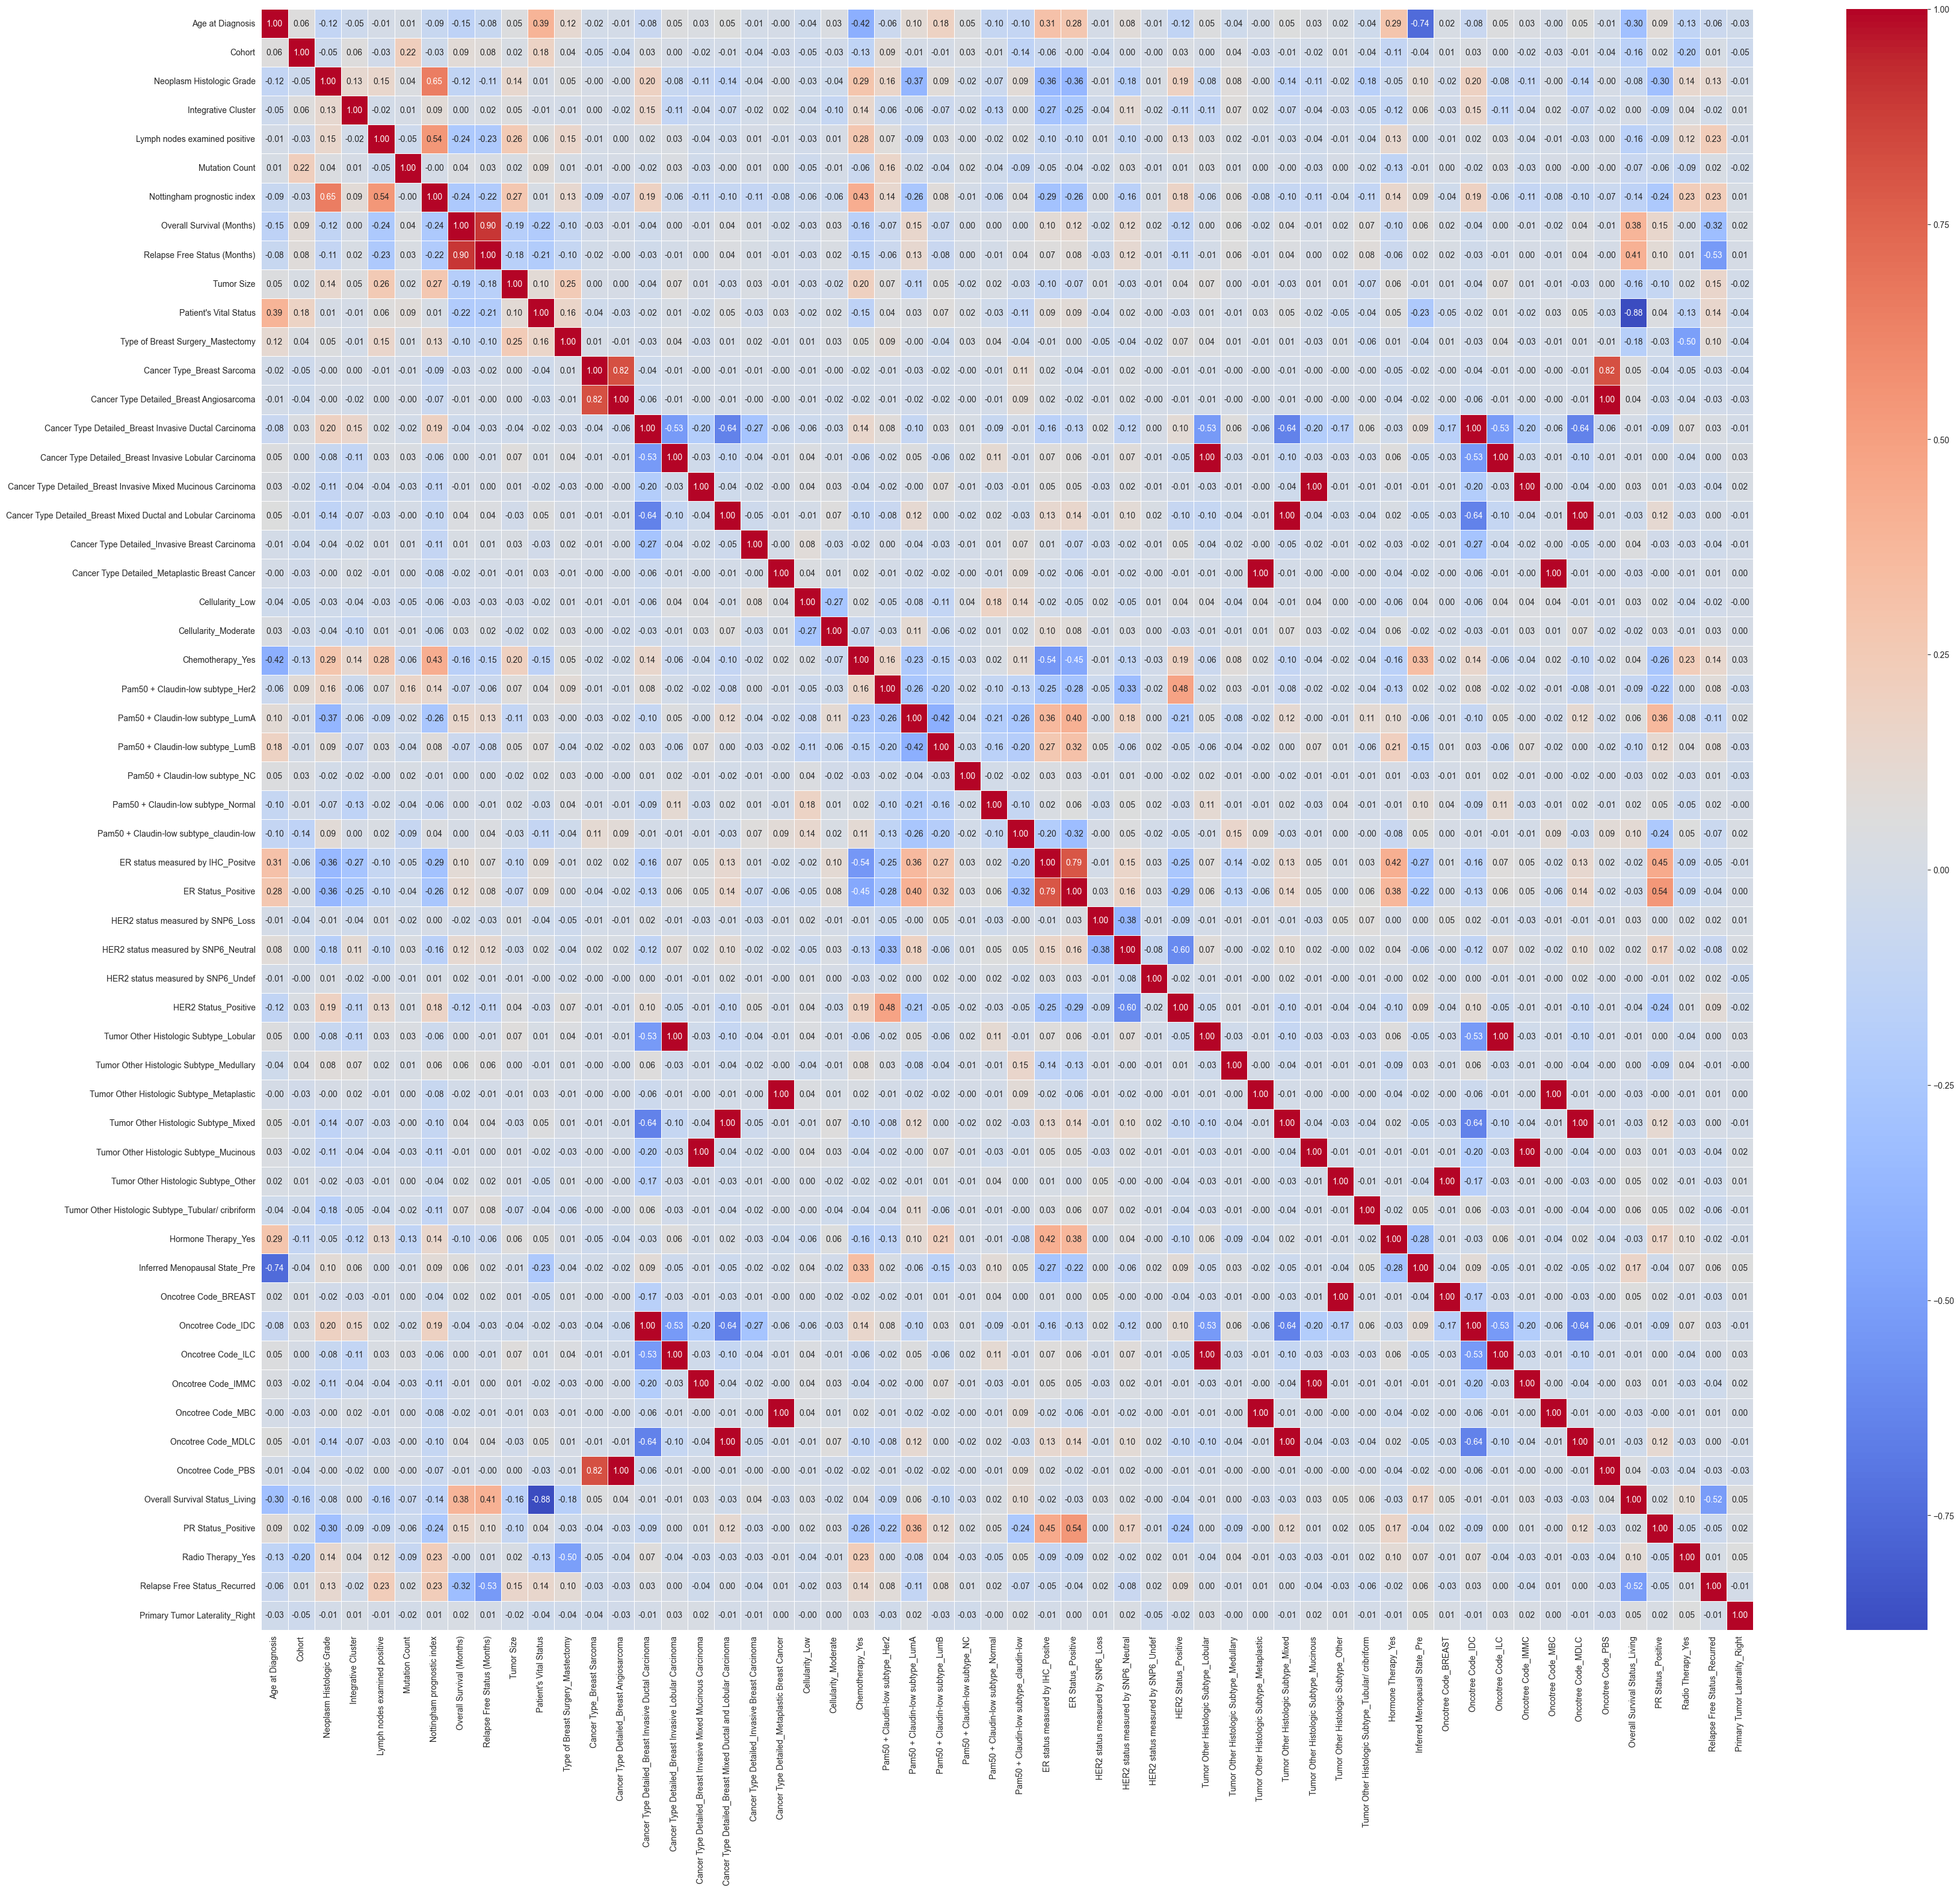

In [138]:
plt.figure(figsize=(40,35))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap of Telecom Customer Churn')
plt.show()

<Axes: >

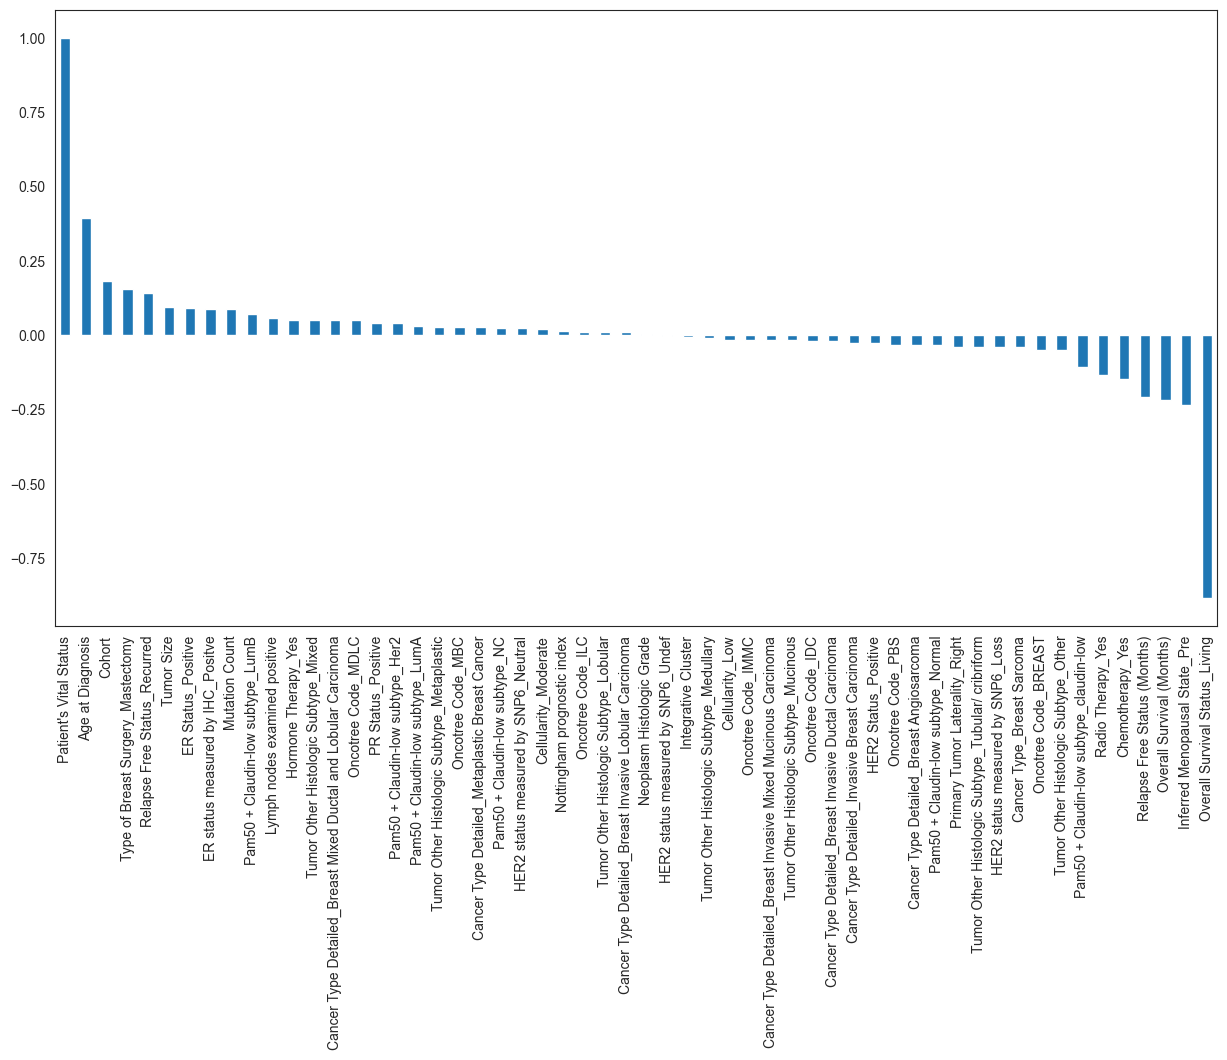

In [139]:
plt.figure(figsize=(15,8))
df_clean.corr()["Patient's Vital Status"].sort_values(ascending=False).plot(kind="bar")

## Intepretation

- Age of Diagnosis , Cohort  and Tumor size seem to positively correlated with Patient's vital Status . While , Overall Survival Status Living , Overall Survival(Months) , Relapse Free Status(Months) seem to be negatively correlated with Patient's vital Status .

- Some variables around the zero-correlation mark (e.g., HER2 status measured by SNP6_Undef and Neoplasm histologic Grade) have minimal or no apparent influence on the target variable, suggesting they may not contribute significantly to the outcome.

- We will explore the patterns of the above correlations further before delving into modeling and identifying the important variables.

In [140]:
( df['Cancer Type Detailed'].value_counts() * 100 / len(df) )



Cancer Type Detailed
Breast Invasive Ductal Carcinoma             77.614957
Breast Mixed Ductal and Lobular Carcinoma    10.661950
Breast Invasive Lobular Carcinoma             7.377463
Invasive Breast Carcinoma                     2.122284
Breast Invasive Mixed Mucinous Carcinoma      1.162203
Breast                                        0.859020
Breast Angiosarcoma                           0.101061
Metaplastic Breast Cancer                     0.101061
Name: count, dtype: float64

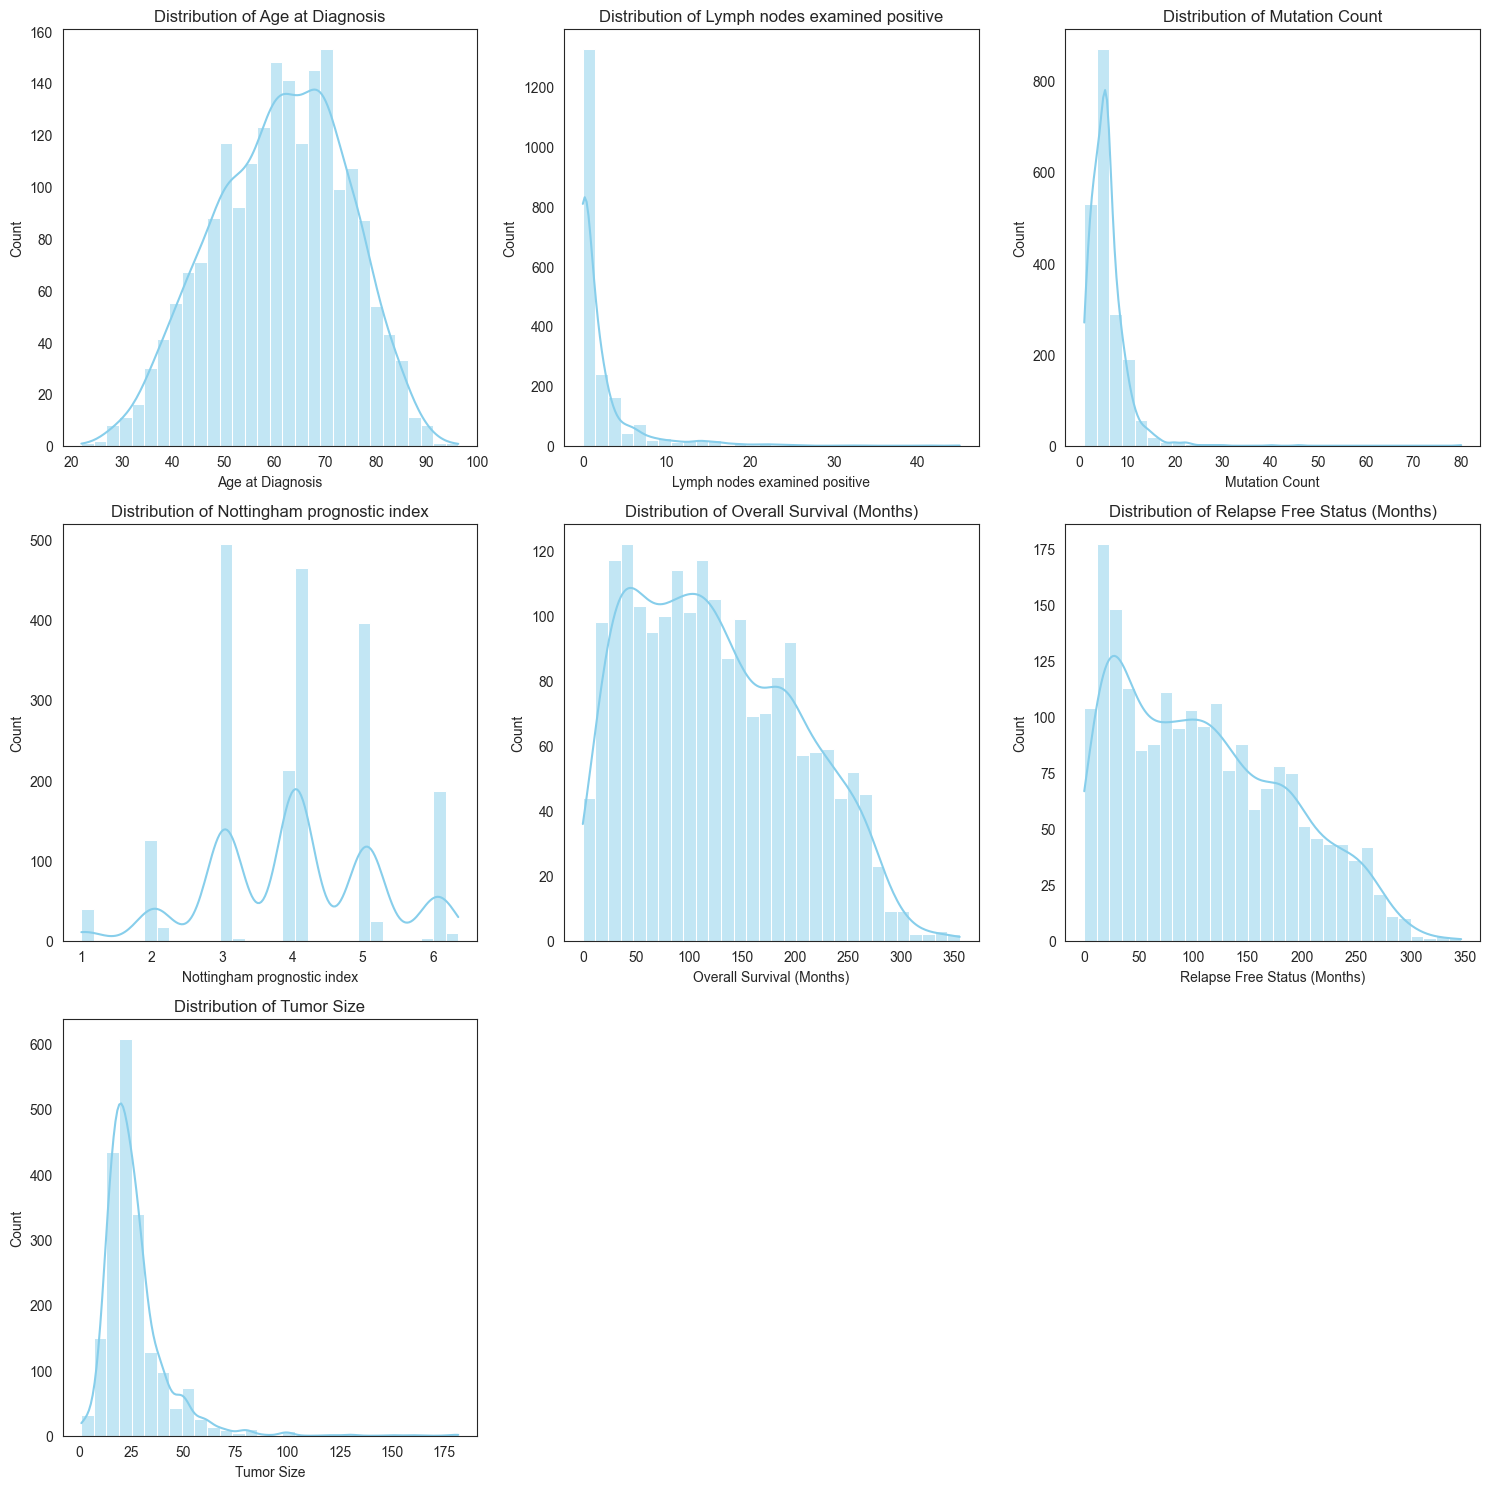

<Figure size 640x480 with 0 Axes>

In [141]:

# Continuous columns: Numerical columns with a larger range of unique values
continuous_columns = [col for col in df.columns if df[col].dtype != 'object' and df[col].nunique() > 20]

# Function to plot distributions
def plot_distributions(continuous_columns, df):

    # Determine the layout of the subplots

    cont_cols = len(continuous_columns)
    
    # Continuous Columns - Histograms
    fig2, axes2 = plt.subplots(nrows=(cont_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((cont_cols // 3) + 1)))
    axes2 = axes2.flatten()
    for idx, col in enumerate(continuous_columns):
        sns.histplot(data=df, x=col, ax=axes2[idx], kde=True, color='skyblue', bins=30)
        axes2[idx].set_title(f'Distribution of {col}', fontsize=12)
    # Hide unused axes
    for idx in range(len(continuous_columns), len(axes2)):
        axes2[idx].set_visible(False)
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_distributions(continuous_columns, df)

plt.savefig('Distribution of Continous Varibles.png')


In [142]:
df.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Tumor Size', 'Patient's Vital Status'],
      dtype='object')

In [143]:
df['Chemotherapy'] = df['Chemotherapy'].map({'Yes': 1, 'No': 0})
df['Hormone Therapy'] = df['Hormone Therapy'].map({'Yes': 1, 'No': 0})
df['Radio Therapy'] = df['Radio Therapy'].map({'Yes': 1, 'No': 0})


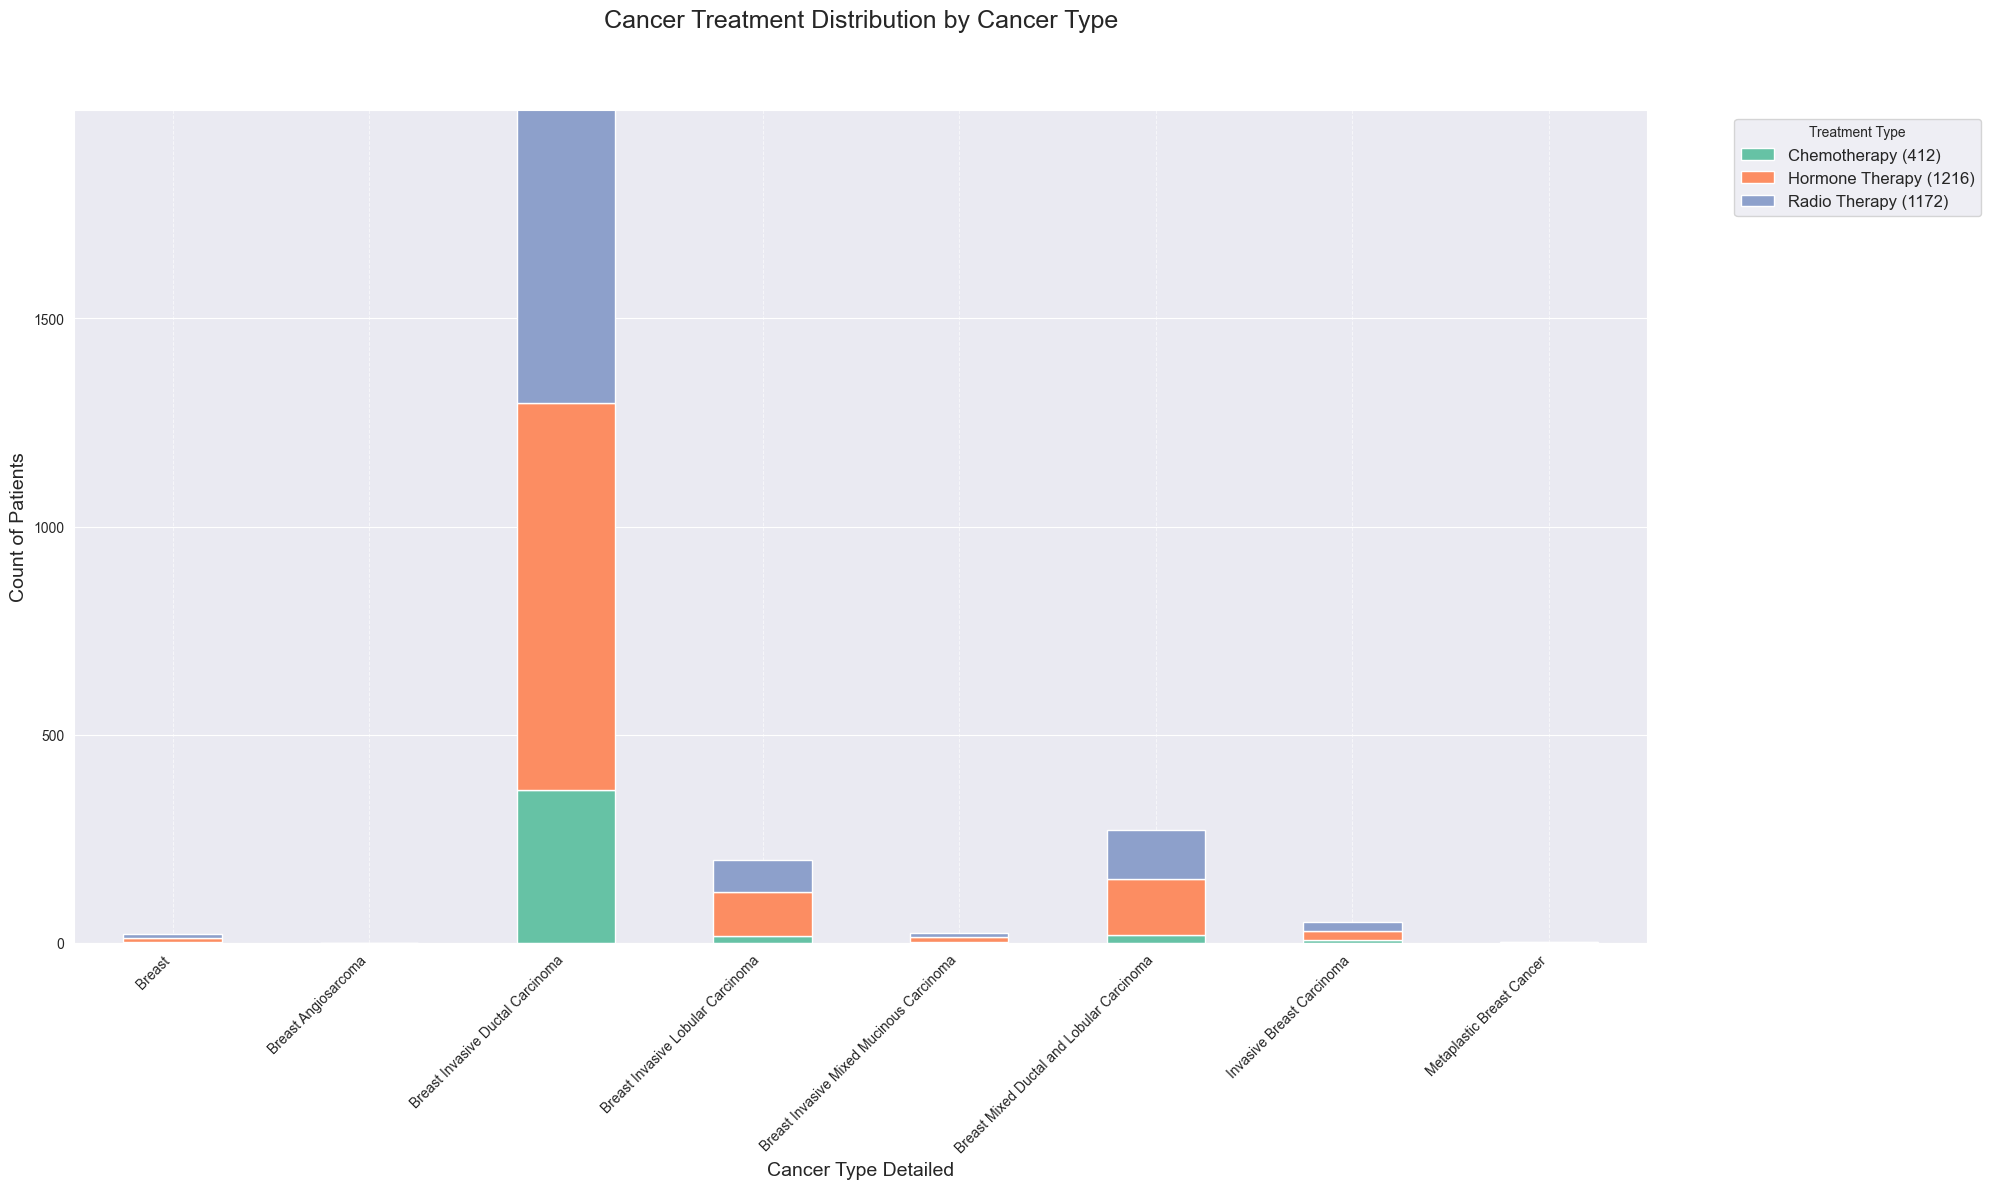

In [144]:

# Group by 'Cancer Type Detailed' and sum the treatment types
cancer_treatment = df.groupby('Cancer Type Detailed')[['Chemotherapy', 'Hormone Therapy', 'Radio Therapy']].sum()

sns.set_style('darkgrid')

# Generate a color palette using Seaborn
colors_treatment = sns.color_palette("Set2", 3)  # Using a palette with 3 colors

# Plot the stacked bar graph with the color palette
ax = cancer_treatment.plot(kind='bar', stacked=True, figsize=(20, 12), color=colors_treatment)

# Add title at the top of the graph with better font size
plt.title("Cancer Treatment Distribution by Cancer Type", fontsize=18, pad=60)  # 'pad' moves the title higher
plt.xlabel("Cancer Type Detailed", fontsize=14)
plt.ylabel("Count of Patients", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the y-axis range from 0 to 2200 with a gap of 200 between ticks
plt.ylim(0, 2000)  # Set y-axis limits
plt.yticks(range(0, 2000, 500))  # Set y-axis ticks with a gap of 200

# Remove gridlines on the y-axis and show gridlines only on the x-axis
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Custom legend showing counts for each treatment type, placed outside the graph
plt.legend(title="Treatment Type", labels=[ 
    f'Chemotherapy ({cancer_treatment["Chemotherapy"].sum()})',
    f'Hormone Therapy ({cancer_treatment["Hormone Therapy"].sum()})',
    f'Radio Therapy ({cancer_treatment["Radio Therapy"].sum()})'
], fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Make sure everything fits well on the plot
plt.tight_layout()

# Show the plot
plt.show()


### Intepretation :

1. Treatment Distribution by Cancer Type:

The graph illustrates how different treatments (Chemotherapy, Hormone Therapy, and Radio Therapy) are distributed among various cancer types. Each bar represents a cancer type, with segments showing the number of patients receiving each treatment.

2. Dominant Treatments:

Larger segments indicate the most commonly used treatment for each cancer type. If Chemotherapy consistently appears as the largest segment, it suggests it is the preferred treatment for multiple cancer types.

3. Variation Across Cancer Types:

Some cancer types have a balanced distribution of all three treatments, while others rely more on a specific type. This reflects differences in treatment strategies and protocols for different cancers.

4. Overall Comparison:

The total height of each bar represents the number of patients diagnosed with that cancer type. Taller bars indicate more prevalent cancers with greater treatment demand.

5. Key Insights:

The legend provides total counts for each treatment type across all cancer types, helping identify the most widely used treatment overall. This analysis can guide resource allocation and further research on treatment effectiveness.


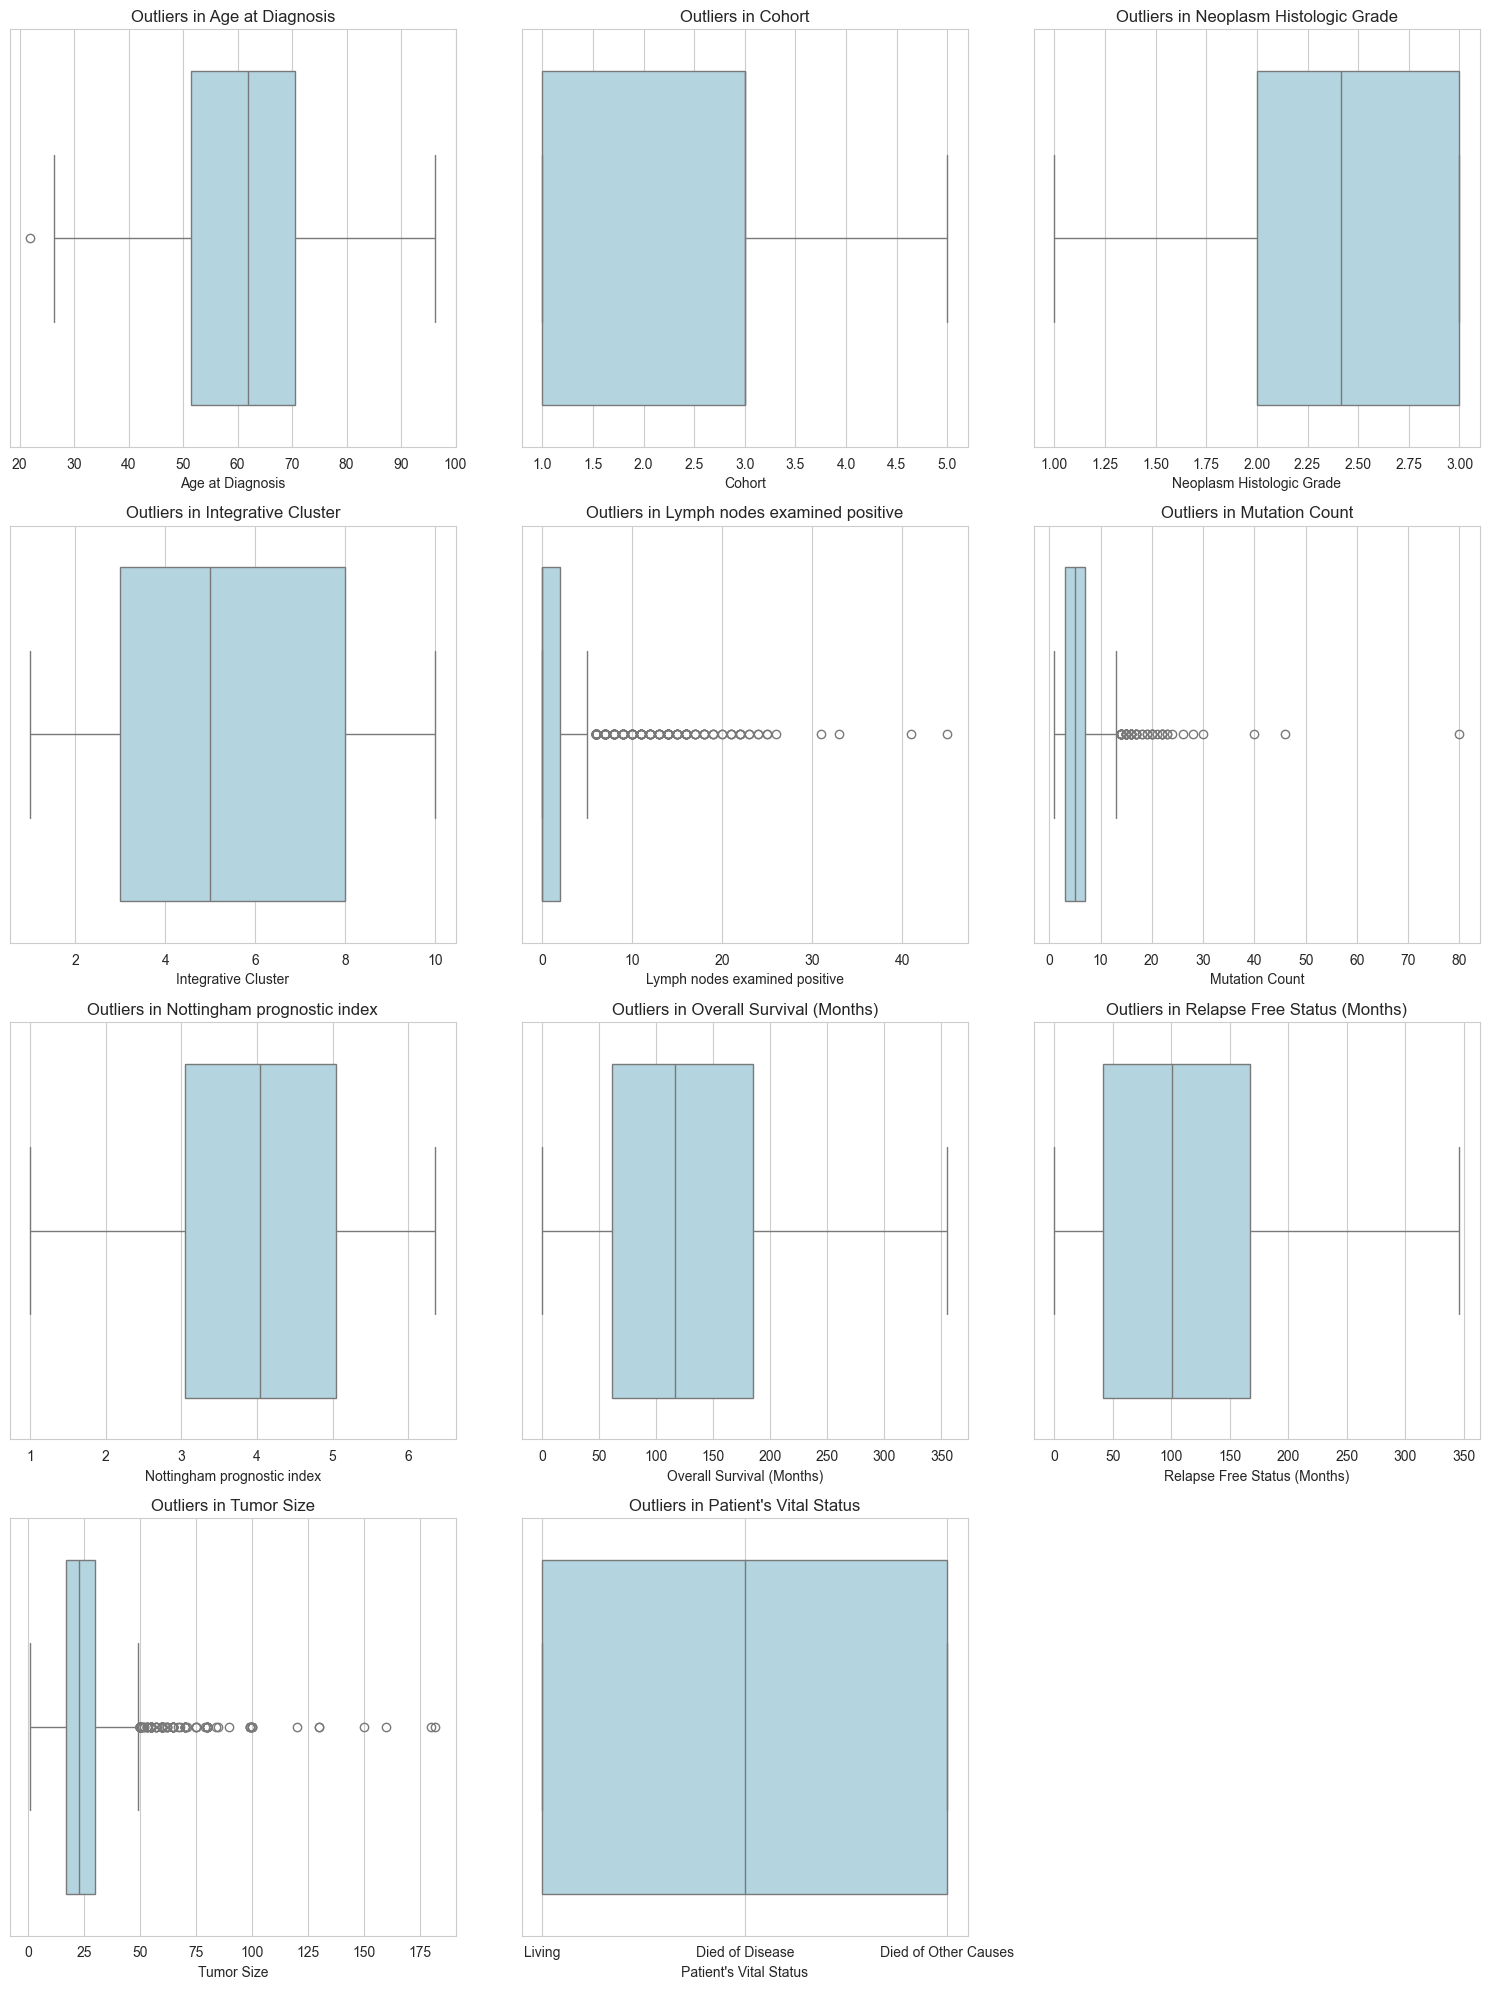

In [145]:

# Set the plot style to make it look professional
sns.set_style("whitegrid")

# Identify the numerical columns in the dataframe
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the subplots
n_cols = 3  # Number of columns (you can adjust this)
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)  # Number of rows needed

# Set up the figure with multiple subplots
plt.figure(figsize=(15, n_rows * 5))  # Adjust the height based on the number of rows

# Loop through each numerical column and plot its boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid of subplots (adjusted with rows and columns)
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Outliers in {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)

# Adjust layout to prevent overlap and ensure readability
plt.tight_layout()

# Show the plot
plt.show()

## INTEPRETATION 

The graph illustrates the number of patients categorized into three vital status groups: Living, Died of Disease, and Died of Other Causes. The following observations can be made :-

1. Living :- The largest group, indicating the majority of patients are alive.

2. Died of Disease :- This group represents the second largest category, showing a significant number of patients succumbed to the disease.

3. Died of Other Causes :- The smallest group, highlighting fewer patients passed away due to reasons unrelated to the disease.

This visualization can provide valuable insights into survival outcomes, helping researchers or clinicians assess treatment efficacy or overall prognosis in the population.

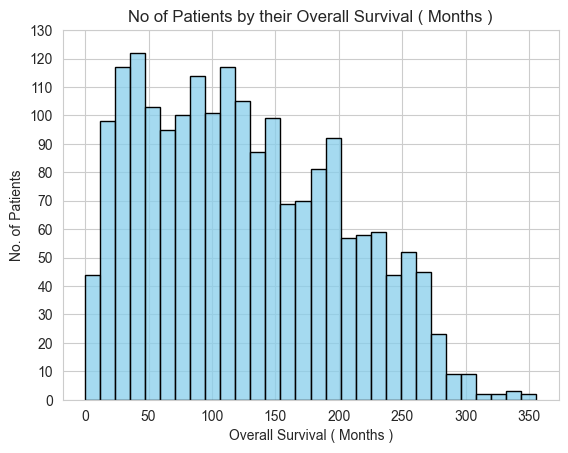

In [146]:
# Plot the histogram
ax = sns.histplot(df['Overall Survival (Months)'], bins=int(180/6), color='skyblue', 
                  edgecolor='black', kde=False)
# Set white background style
sns.set_style("ticks")

# Set labels and title
ax.set_ylabel('No. of Patients')
ax.set_xlabel('Overall Survival ( Months )')
ax.set_title('No of Patients by their Overall Survival ( Months )')

# Adjust y-axis ticks with a 10-10 gap
y_max = ax.get_ylim()[1]  # Get the maximum value on the y-axis
ax.set_yticks(range(0, int(y_max) + 10, 10))  # Set ticks at intervals of 10

plt.show()


### Intepretations : 

- The shape of the histogram will provide insights into the survival distribution of the patient population. If the graph is skewed toward the left, it suggests that most patients had shorter overall survival (lower months). If it's skewed to the right, it indicates that most patients survived longer.

- If the distribution appears roughly normal, it would suggest a more balanced spread of patients across different survival times.

- A peak at a specific interval would indicate that a large number of patients survived within that time range.

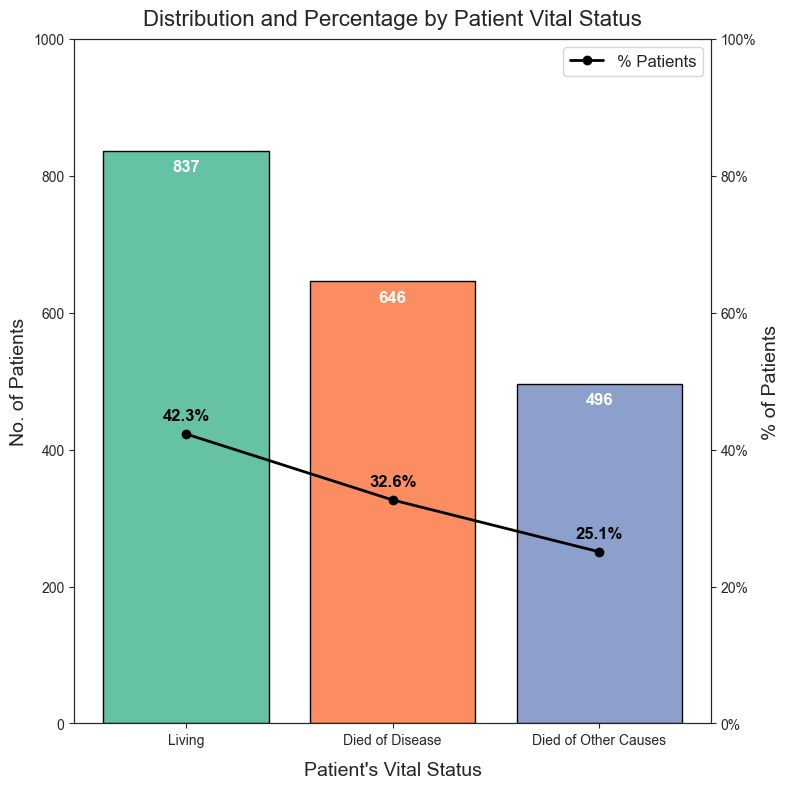

In [147]:

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 8))
sns.set_style('white')

# Get the count of each category
count_data = df["Patient's Vital Status"].value_counts()

# Define a color palette using Seaborn
colors_count = sns.color_palette("Set2", len(count_data))

# Plot the bar graph for the counts (left y-axis)
bars = ax1.bar(count_data.index, count_data.values, color=colors_count, edgecolor='black')
ax1.set_ylabel('No. of Patients', fontsize=14)
ax1.set_title('Distribution and Percentage by Patient Vital Status', fontsize=16, pad=10)
ax1.set_xlabel("Patient's Vital Status", fontsize=14, labelpad=10)
ax1.set_ylim(0, 1000)  # Set y-axis limit for the count

# Calculate the percentage for each category
percentage_data = (count_data * 100) / len(df)

# Create a second y-axis for the percentages
ax2 = ax1.twinx()
lines = ax2.plot(count_data.index, percentage_data.values, color='black', marker='o', linewidth=2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())  # Format as percentage
ax2.set_ylabel('% of Patients', fontsize=14)
ax2.set_ylim(0, 100)  # Set y-axis limit for percentage

# Add percentage labels to the percentage plot
for i, value in enumerate(percentage_data):
    ax2.text(i, value + 2, f"{value:.1f}%", ha='center', fontsize=12, color='black', weight='bold')

# Add bar labels for the counts
for bar, value in zip(bars, count_data):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 30, f"{value}", ha='center', fontsize=12, color='white', weight='bold')

# Add a legend combining both axes
ax2.legend(lines, ['% Patients'], loc='upper right', fontsize=12)

# Show the combined plot
plt.tight_layout()
plt.show()


### Intepretation :

- Living (837 patients, 42.3%): The majority of patients are alive. This indicates a relatively positive outcome in the dataset.

- Died of Disease (646 patients, 32.6%): Over one-third of patients lost their lives to the disease.

- Died of Other Causes (496 patients, 25.1%): Around one-fourth of patients passed away due to other causes, indicating the potential impact of unrelated health factors. 


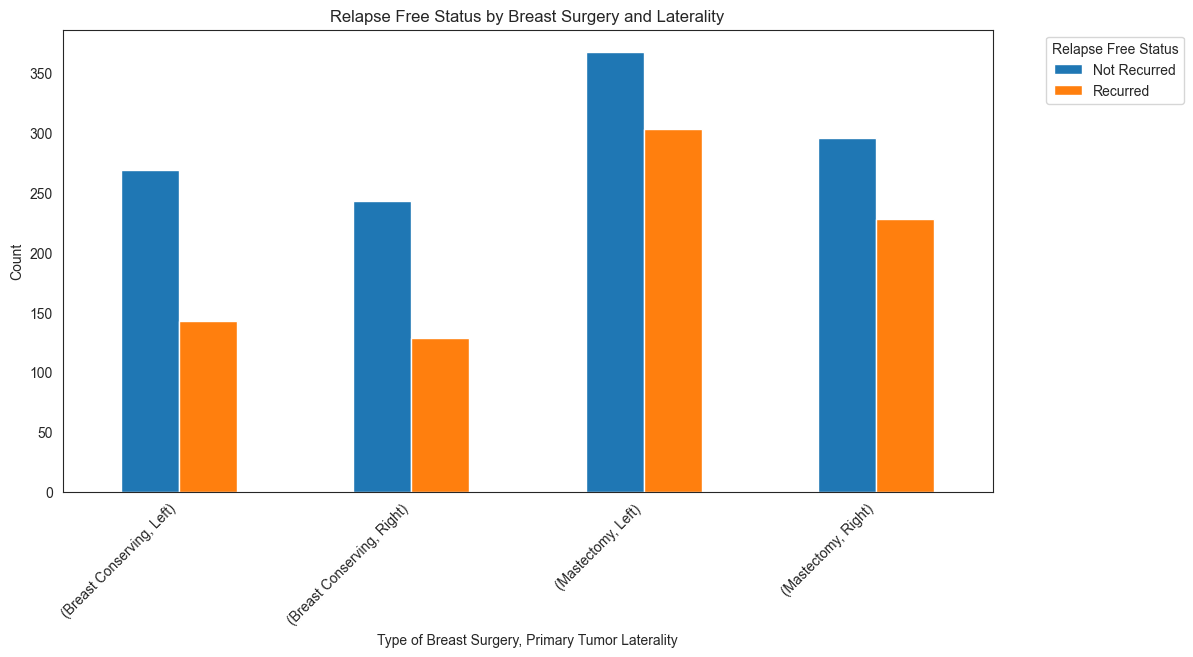

In [148]:

# Create a cross-tabulation table
relapse_surgery_laterality = pd.crosstab([df['Type of Breast Surgery'], df['Primary Tumor Laterality']], df['Relapse Free Status'])

# Plot grouped bar chart
relapse_surgery_laterality.plot(kind='bar', figsize=(12, 6))
plt.title('Relapse Free Status by Breast Surgery and Laterality')
plt.xlabel('Type of Breast Surgery, Primary Tumor Laterality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Relapse Free Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.show()

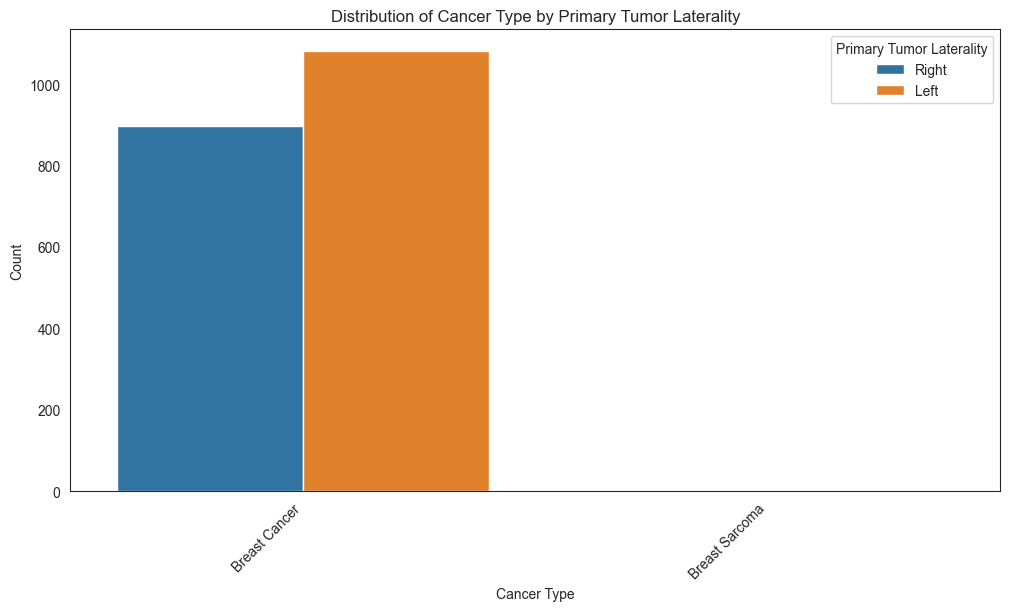

In [149]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Cancer Type', hue='Primary Tumor Laterality', data=df)
plt.title('Distribution of Cancer Type by Primary Tumor Laterality')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Primary Tumor Laterality')
plt.show()

In [150]:
# pip install plotly# Install plotly if you haven't already


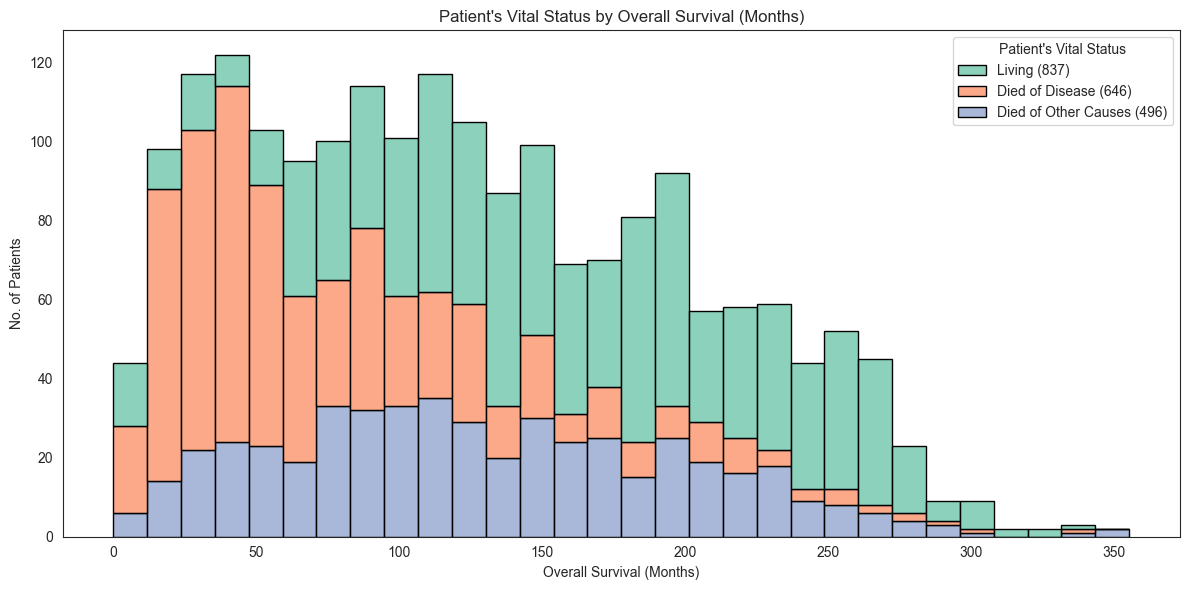

In [151]:
 

# Filter necessary columns
filtered_df = df[['Overall Survival (Months)', "Patient's Vital Status"]].dropna()

# Get the count of each category in 'Patient's Vital Status'
status_counts = filtered_df["Patient's Vital Status"].value_counts()

# Plot the histogram using hue for Patient's Vital Status
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=filtered_df,
    x='Overall Survival (Months)',
    hue="Patient's Vital Status",
    bins=30,  # Number of bins
    kde=False,
    palette='Set2',
    edgecolor='black',
    multiple='stack'  # Stack bars for better comparison
)

# Customize labels and title
ax.set_ylabel('No. of Patients')
ax.set_xlabel('Overall Survival (Months)')
ax.set_title("Patient's Vital Status by Overall Survival (Months)")

# Update the legend manually
for i, label in enumerate(ax.legend_.get_texts()):
    # Get the current label and append the count
    new_label = f"{label.get_text()} ({status_counts[label.get_text()]})"
    label.set_text(new_label)

# Show the plot
plt.tight_layout()
plt.show()

### Intepretation :

- Patients with longer survival durations are primarily in the "Living" category, as indicated by the higher frequency of green bars on the right.  

- Patients who "Died of Disease" are concentrated in shorter survival durations, seen on the left of the grap

- A consistent but smaller distribution of those "Died of Other Causes" is observed across all survival durations. ns. 


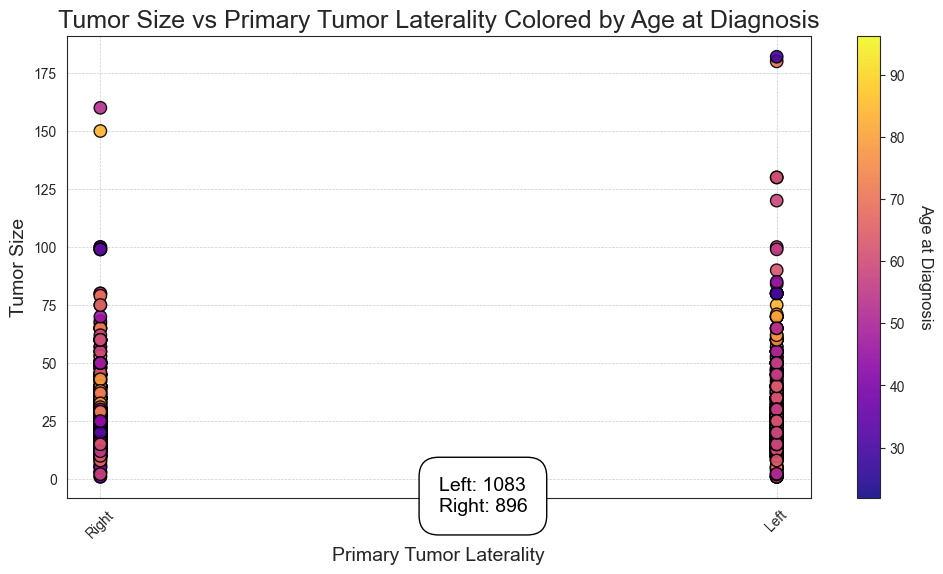

In [152]:
# Set the style for the plot for better clarity
# plt.style.use('seaborn-v0_8-muted')

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Count the number of people in each "Primary Tumor Laterality" category
laterality_counts = df['Primary Tumor Laterality'].value_counts()

# Map colors to Age at Diagnosis, using a better colormap
scatter = plt.scatter(
    df['Primary Tumor Laterality'], 
    df['Tumor Size'], 
    c=df['Age at Diagnosis'],  # Color by Age at Diagnosis
    cmap='plasma',  # Use a more distinct color map for better visibility
    alpha=0.9,  # Slightly less transparency to make points more visible
    edgecolors='black',  # Darker border for better contrast
    s=80  # Adjust point size for better visibility
)

# Add a color bar for Age at Diagnosis with a larger label for clarity
cbar = plt.colorbar(scatter)
cbar.set_label('Age at Diagnosis', rotation=270, labelpad=20, fontsize=12)

# Set the title and labels with improved font size
plt.title('Tumor Size vs Primary Tumor Laterality Colored by Age at Diagnosis', fontsize=18)
plt.xlabel('Primary Tumor Laterality', fontsize=14)
plt.ylabel('Tumor Size', fontsize=14)

# Show a grid to improve readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display x-tick labels in a rotated manner for better clarity
plt.xticks(rotation=45)

# Create custom bins for Age at Diagnosis


# Add the count text for Left and Right tumors in the top left of the plot
left_count = laterality_counts.get("Left", 0)
right_count = laterality_counts.get("Right", 0)
plt.text(0.5, 1.02, f"Left: {left_count}\nRight: {right_count}", 
         ha='left', va='top', fontsize=14, color='black', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Show the plot
plt.show()

In [153]:
df_clean.shape

(1979, 56)

In [154]:
cols = ['Age at Diagnosis', 'Tumor Size', 'Mutation Count']

for col in cols:
    q1 = df_clean[col].quantile(0.25)  # 1st quartile
    q3 = df_clean[col].quantile(0.75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range
    lb = q1 - 1.5 * iqr  # Lower bound
    ub = q3 + 1.5 * iqr  # Upper bound (use 1.5*iqr by convention, adjust as needed)
    
    # Filter the dataframe to exclude outliers
    df_clean = df_clean[(df_clean[col] >= lb) & (df_clean[col] <= ub)]


In [155]:
df_clean.shape

(1772, 56)

In [156]:
df_clean.head()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,...,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MBC,Oncotree Code_MDLC,Oncotree Code_PBS,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred,Primary Tumor Laterality_Right
0,75.65,1.0,3.0,4,10.0,5.693757,6.044,140.500000,138.65,22.0,...,0,0,0,0,0,1,0,1,0,1
1,43.19,1.0,3.0,4,0.0,2.000000,4.020,84.633333,83.52,10.0,...,0,0,0,0,0,1,1,1,0,1
2,48.87,1.0,2.0,3,1.0,2.000000,4.030,163.700000,151.28,15.0,...,0,0,0,0,0,0,1,0,1,1
3,47.68,1.0,2.0,9,3.0,1.000000,4.050,164.933333,162.76,25.0,...,0,0,0,1,0,1,1,1,0,1
4,76.97,1.0,3.0,9,8.0,2.000000,6.080,41.366667,18.55,40.0,...,0,0,0,1,0,0,1,1,1,1


In [157]:
df_clean.shape

(1772, 56)

In [158]:
X = df_clean.drop("Patient's Vital Status", axis=1)

y = df_clean['Patient\'s Vital Status']

In [159]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=42)

In [160]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [161]:
# Transforms each values using that particular column's mean and standard deviation to (X - mu / sigma)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((1417, 55), (355, 55), (1417,), (355,))

In [163]:

# Create a dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train_scaled)
    
    # Evaluate on the training set
    print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
    print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
    print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate on the test set
    print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
    print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



==================== Logistic Regression ====================
Training Accuracy: 0.9717713479181369

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       0.92      0.99      0.96       444
           2       0.99      0.89      0.94       343

    accuracy                           0.97      1417
   macro avg       0.97      0.96      0.97      1417
weighted avg       0.97      0.97      0.97      1417


Training Confusion Matrix:
 [[630   0   0]
 [  0 441   3]
 [  0  37 306]]

Test Accuracy: 0.971830985915493

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       0.94      0.97      0.96       114
           2       0.97      0.93      0.95        94

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       

C:\Users\rniti\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Hyperparameter Tunning

In [ ]:


# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1]
    }
}

# Run GridSearchCV for each model
tuned_models = {}
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Store the best estimator and parameters
    best_model = grid_search.best_estimator_
    tuned_models[name] = {
        "best_estimator": best_model,
        "best_params": grid_search.best_params_
    }
    
    # Evaluate the model on test data
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")







==================== Logistic Regression ====================
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.9661150649479919
Train Accuracy: 0.9703599153140438
Test Accuracy: 0.9690140845070423
Precision: 0.9707769717299493
Recall: 0.9690140845070423
F1 Score: 0.9688234491454776
Confusion Matrix:
[[147   0   0]
 [  0 113   1]
 [  0  10  84]]


==================== Random Forest ====================
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9668192903001046
Train Accuracy: 0.9915314043754411
Test Accuracy: 0.9690140845070423
Precision: 0.9717408450704226
Recall: 0.9690140845070423
F1 Score: 0.9687643103259416
Confusion Matrix:
[[147   0   0]
 [  0 114   0]
 [  0  11  83]]


==================== Decision Tree ====================
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best cross-v

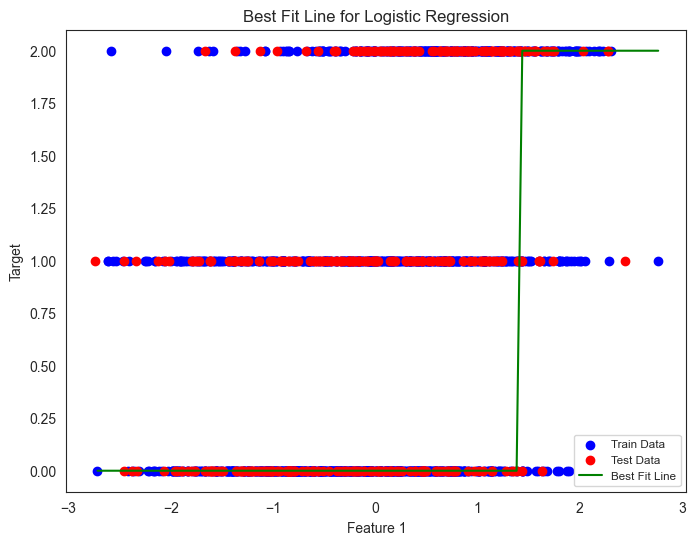

In [165]:
# Plot best fit line for Logistic Regression (if applicable)
if "Logistic Regression" in tuned_models:
    best_lr = tuned_models["Logistic Regression"]["best_estimator"]
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_train_scaled[:, 0], y_train, color='blue', label='Train Data')
    plt.scatter(X_test_scaled[:, 0], y_test, color='red', label='Test Data')
    
    # Generate best fit line
    x_vals = np.linspace(min(X_train_scaled[:, 0]), max(X_train_scaled[:, 0]), 100).reshape(-1, 1)
    y_vals = best_lr.predict(np.hstack([x_vals] + [np.zeros((100, X_train_scaled.shape[1] - 1))]))
    plt.plot(x_vals, y_vals, color='green', label='Best Fit Line')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend(loc='lower right', fontsize='small', frameon=True)
    plt.title('Best Fit Line for Logistic Regression')
    plt.show()

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_test_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Save the trained Logistic Regression model
joblib.dump(lr_model, "logistic_regression_model.joblib")
print("Logistic Regression model saved as 'logistic_regression_model.joblib'")

# Save the scaler for consistent preprocessing during deployment
joblib.dump(scaler, "scaler.joblib")
print("Scaler saved as 'scaler.joblib'")

Logistic Regression Test Accuracy: 0.971830985915493

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       0.94      0.97      0.96       114
           2       0.97      0.93      0.95        94

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       0.97      0.97      0.97       355


Test Confusion Matrix:
 [[147   0   0]
 [  0 111   3]
 [  0   7  87]]
Logistic Regression model saved as 'logistic_regression_model.joblib'
Scaler saved as 'scaler.joblib'


In [167]:
# import joblib

# Load the saved model and scaler
# lr_model = joblib.load("logistic_regression_model.joblib")
# scaler = joblib.load("scaler.joblib")

# # Predict with new data
# new_data = [[...]]  # Replace with new sample(s)
# new_data_scaled = scaler.transform(new_data)
# prediction = lr_model.predict(new_data_scaled)
# print("Prediction:", prediction)

In [174]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(model, X_test_scaled, model.predict(X_test_scaled), n_repeats=10, random_state=42)

# Create a DataFrame with feature importances
permutation_importance_df = pd.DataFrame({
    'Feature': df_clean.columns,
    'Importance': result.importances_mean
})

# Sort by importance
permutation_importance_df = permutation_importance_df.sort_values(by='Importance', ascending=False)

# Display the result
st.write("Permutation Feature Importance:")
st.write(permutation_importance_df)


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.